In [421]:
import networkx as nx
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

In [293]:
failed = ['Granté','Metal Boulder','Spiked Boulder','Central Hy'] #Characters that I failed to retrive info on
charactersDf = pd.read_csv('charecters.csv')
charactersDf.info

<bound method DataFrame.info of      Unnamed: 0               Name  type
0             0             Baddek  Ally
1             1             Bamboo  Ally
2             2              Banji  Ally
3             3             Baumar  Ally
4             4              Bayge  Ally
..          ...                ...   ...
653         671  Waterblight Ganon  Boss
654         673       Master Kohga  Boss
655         674        Final Trial  Boss
656         675     Calamity Ganon  Boss
657         676     Central Hyrule  Boss

[658 rows x 3 columns]>

## Todo
- Sækja info frá einum character
- Smíða regex
- Höndla space

In [380]:
print(charactersDf.Name[0])
with open("txt files/" + charactersDf.Name[0] + '.txt') as f:
    text = f.read()

print(text)

Baddek
{{Infobox Character
|image= File:BotW Baddek Model.png
|caption= 
|pronunciation= 
|title= 
|alias= 
|race= {{Term|BotW|Hylian|link}}
|gender= Male<ref name="Guy"/>
|game= {{BotW}}
|other= 
|era= {{Term|BotW|Era of the Wilds|link}}
|family= Unnamed wife <small>(estranged)</small><ref name="Wife">{{Cite|I talk about horses so much that my wife left me...for a horse.|Baddek|BotW}}</ref>
|voiceactor= 
|theme= 
|counter= 
}}
{{Term/Store|Baddek||Series, BotW}} is a character in {{BotW}}.<ref>{{Cite|Baddek|N/A|BotW}}</ref>

==Biography==
Baddek is a {{Term|BotW|Hylian|link}} who rides a {{Term|BotW|Horse}}, carrying a {{Term|BotW|Wooden Shield|link}} and {{Term|BotW|Traveler's Sword|link}}. He travels along the road from [[Serenne Stable]] all the way to [[Tabantha Bridge Stable]] and back. Once he reaches a Stable, he'll rest nearby with his Horse for a moment before leaving again.

When spoken to, Baddek will reveal that he has a great appreciation for Horses, claiming he sees the 

In [381]:
pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
pattern2 = '\{\{(?:Term|Plural)\|BotW\|(.*?)(?:\|link)?\}\}'

yo = re.findall(pattern2,text)
print(yo)

['Hylian', 'Era of the Wilds', 'Hylian', 'Horse', 'Wooden Shield', "Traveler's Sword", 'Link', 'Stable', 'White Horse', 'Stalhorse', 'Link', 'Stable', 'Bridle', 'Saddle', 'Carrot']


In [382]:
gender = re.findall(r'(?:gender=\s)([a-zA-Z]*)(?:<.*?\/>)',text)
if gender:
    print(gender[0])
else:
    print('Not found')

Male


In [383]:
race = re.findall(r'(?:race=\s)\{\{Term\|BotW\|(.*?)\|link\}\}',text)
if race:
    print(race[0])
else:
    print('Not found')

Hylian


In [384]:
def nodeInfo(text):
    genderRe1 = re.findall(r'(?:gender=\s)([a-zA-Z]*)(?:<.*?\/>)?(?:\{\{.*?\}\})?',text)
    if genderRe1:
        if genderRe1[0] == '':
            gender = 'Unknown'
        else:
            gender = genderRe1[0]
    else:
        gender = 'Unknown'
    raceRe1 = re.findall(r'(?:race=\s)\{\{Term\|BotW\|(.*?)\|link\}\}',text)
    raceRe2 = re.findall(r'(?:race=\s)\[\[(.*?)(?:\|.*?)?\]\]',text)

    if raceRe1:
        race = raceRe1[0]
    elif raceRe2:
        race = raceRe2[0] 
    else:
        race = 'none'
    pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
    pattern2 = '\{\{Term\|BotW\|(.*?)\|link\}\}'
    square = re.findall(pattern1,text)
    curly = re.findall(pattern2,text)
    edges = square + curly
    return gender,race,edges

g,r,e = nodeInfo(text)
print(g,r,e,len(e))
    
    

Male Hylian ['Serenne Stable', 'Tabantha Bridge Stable', 'Sanidin Park Ruins', 'Hebra Mountains', 'Woodland Stable', 'Highland Stable', 'Outskirt Stable', 'South Akkala Stable', 'Giant Horse', 'Master Cycle Zero', 'Paraglider', 'Nazbi', 'Savelle', 'Yammo', 'Serenne Stable', 'Breach of Demise', 'Tabantha Bridge Stable', 'Hylian', 'Era of the Wilds', 'Hylian', 'Horse}}, carrying a {{Term|BotW|Wooden Shield', "Traveler's Sword", 'Link', 'White Horse', 'Stalhorse', 'Link', 'Bridle', 'Saddle'] 28


In [385]:
def filterC(chars,charList):
    ret = []
    i = 0
    # print(charList)
    for i in range(len(chars)):
        # print(name, name in charList,type(name))
        if chars[i] in charList:
            ret.append(chars[i])
    return ret
charList = filterC(e,list(charactersDf.Name))
# print(e[11] in list(charactersDf.Name),e[13])
print(len(charList),charList)

5 ['Nazbi', 'Savelle', 'Yammo', 'Link', 'Link']


In [386]:
def tuples(name, list):
    tmp = []
    for item in list:
        tmp.append((name,item))
    return tmp

In [387]:
nameList = list(charactersDf.Name)
networkInfoDf = pd.DataFrame(columns={"name","race","gender","charlist",'role'})
for row in charactersDf.iterrows():
    try:
        name= row[1]['Name'].replace(' ','_')
        with open("txt files/" + name + '.txt',encoding='utf-8') as f:
            text = f.read()
        g,r,e = nodeInfo(text)
        charList = filterC(e,nameList)
        networkInfoDf = networkInfoDf.append({"name":name,"race":r,"gender":g,"charlist":tuples(name,charList),"role":row[1]['type']},ignore_index=True)
    
    except:
        print('aa',name)
    
    


aa Granté
aa Metal_Boulder


In [388]:
G = nx.DiGraph()
nameList = list(charactersDf.Name)
#Add all nodes to graph
for row in networkInfoDf.iterrows():
    name = row[1]['name']
    gender = row[1]['gender']
    race = row[1]['race']
    role = row[1]['role']
    G.add_node(name,race = race, gender = gender,role=role)

for row in networkInfoDf.iterrows():
    charList = row[1]['charlist']
    G.add_edges_from(charList)


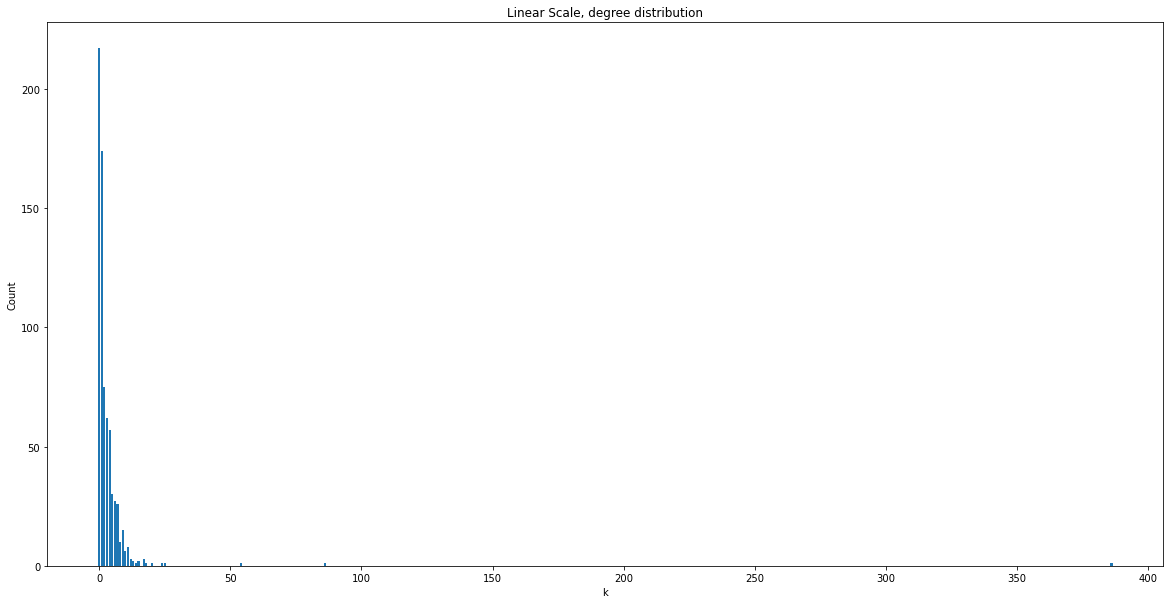

In [389]:
degrees = [G.degree(n) for n in G.nodes()]
maxx = max(G.degree, key=lambda x: x[1])[1]

hist,bin_edges = np.histogram(degrees,maxx-1)

plt.figure(figsize=(20,10))
plt.bar(bin_edges[:-1],hist)
plt.title("Linear Scale, degree distribution")
plt.xlabel("k")
plt.ylabel("Count")
plt.show()

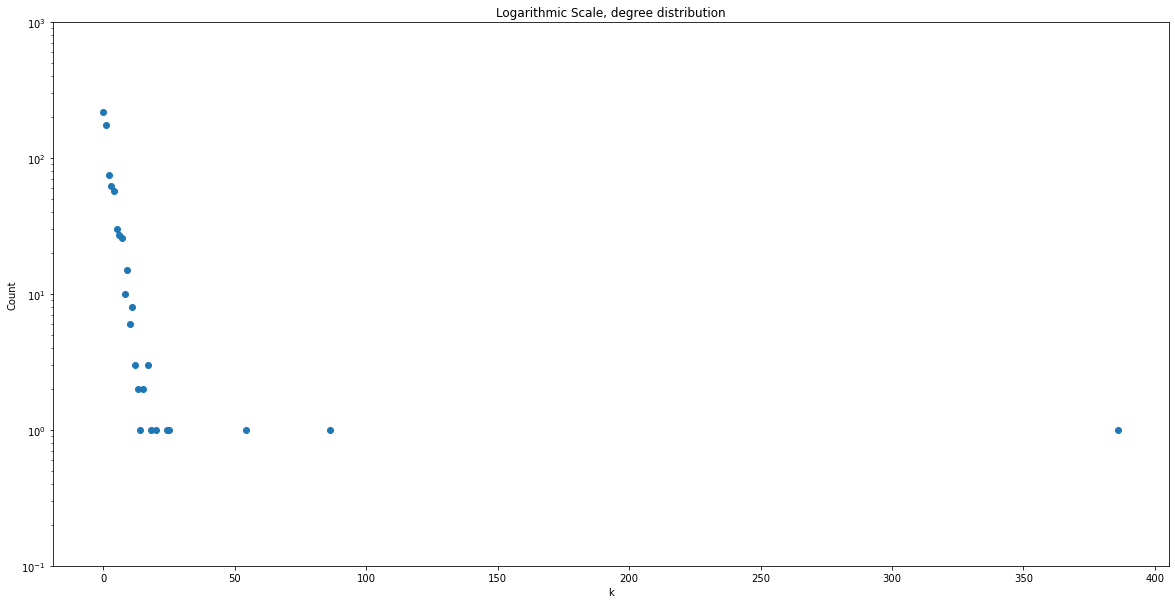

In [390]:
fig, ax = plt.subplots(figsize=(20,10))
  
ax.set_yscale("log")
ax.scatter(bin_edges[:-1],hist)
  
ax.set_ylim(1E-1, 1e3)

plt.title("Logarithmic Scale, degree distribution")
plt.xlabel("k")
plt.ylabel("Count")
plt.show()

## Exercise 2: Simple network statistics and analysis

Visualize the network (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you've already generated the BotW network and extracted the giant connected component. Use the GCC to report the results.

Exercise 1a: Stats (see lecture 4 and 5 for more hints)



In [391]:
#Extracting the giant component
GunD = G.to_undirected()
giant = list(max(nx.connected_components(GunD), key=len))
gcc = G.subgraph(giant).copy()
# plt.figure(figsize=(20, 10))
# nx.draw(gcc, node_size = 30)

- What is the number of nodes in the network?
- More importantly, what is the number of links?

In [392]:
print('Number of nodes and links in the network')
print('------------------------------------------')
print(nx.info(gcc))

Number of nodes and links in the network
------------------------------------------
Name: 
Type: DiGraph
Number of nodes: 594
Number of edges: 1472
Average in degree:   2.4781
Average out degree:   2.4781


- Plot the distributions of Role, Race, and Gender.

In [411]:
races = set()
for node in gcc.nodes(data=True):
    if bool(node[1]):
        races.add(node[1]['race'])
raceCount = {}
for item in races:
    raceCount[item] = 0   
genderCount ={'Male':0,'Female':0,'Unknown':0}
roleCount = {'Ally':0, 'Enemy':0, 'Boss':0}


for node in gcc.nodes(data=True):
    if bool(node[1]):
        raceCount[node[1]['race']] = raceCount[node[1]['race']] + 1
        genderCount[node[1]['gender']] = genderCount[node[1]['gender']] + 1
        roleCount[node[1]['role']] = roleCount[node[1]['role']] + 1

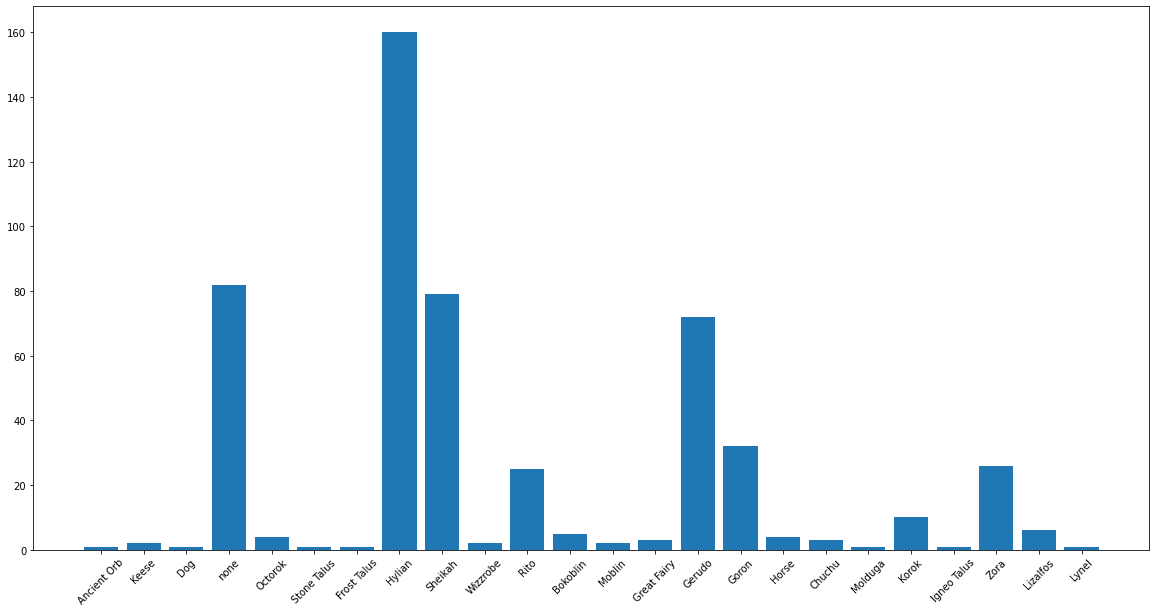

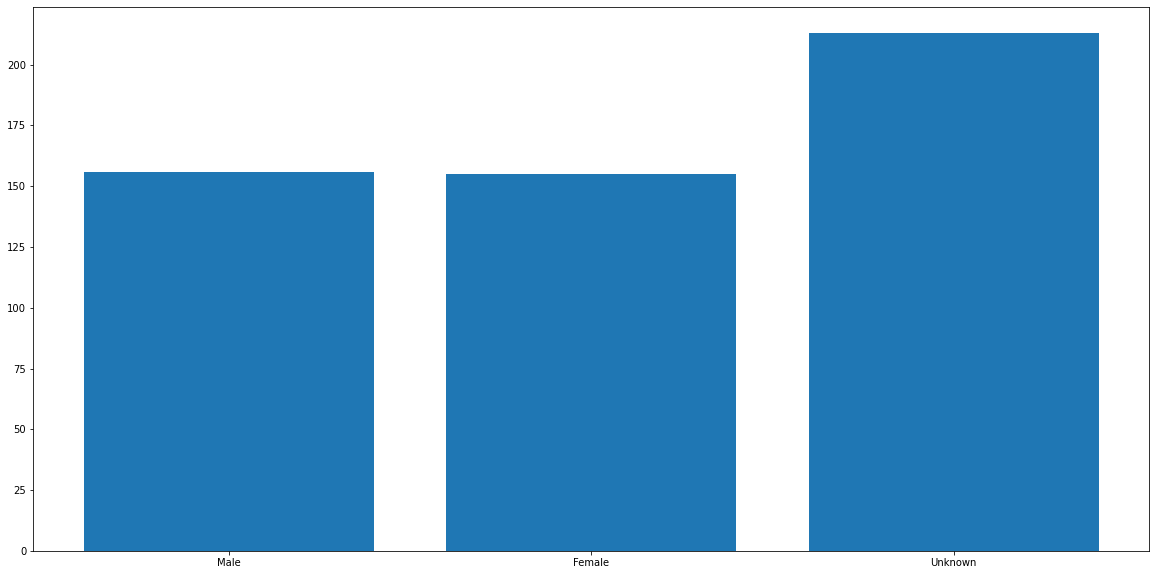

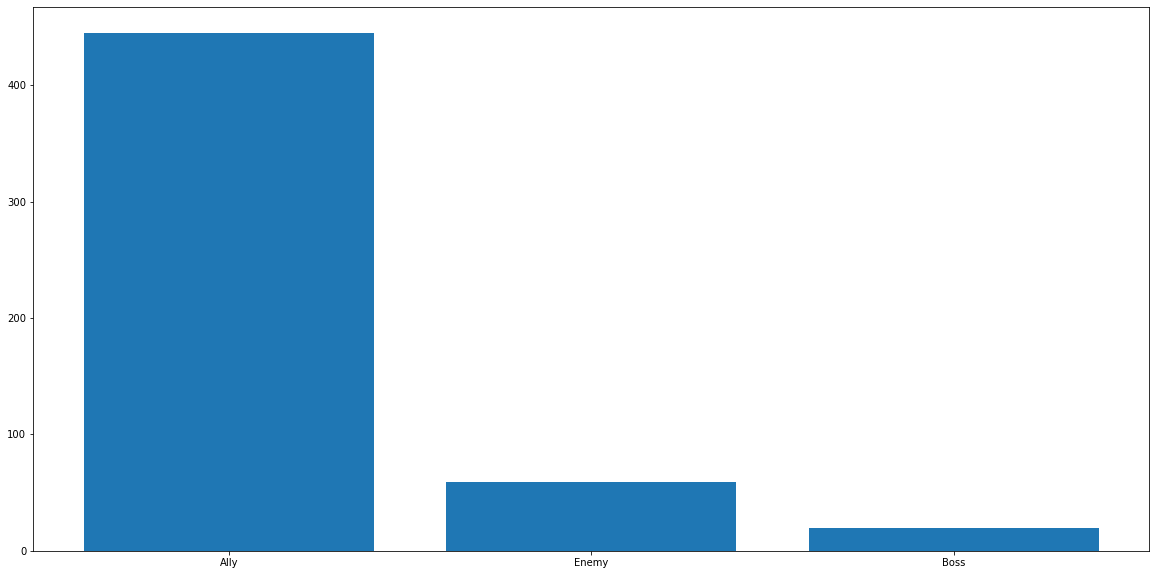

In [413]:
plt.figure(figsize=(20,10))
plt.bar(raceCount.keys(), raceCount.values())
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20,10))
plt.bar(genderCount.keys(), genderCount.values())
plt.show()
plt.figure(figsize=(20,10))
plt.bar(roleCount.keys(), roleCount.values())
plt.show()

- Plot the total (in+out), in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from -the out-degree distribution?


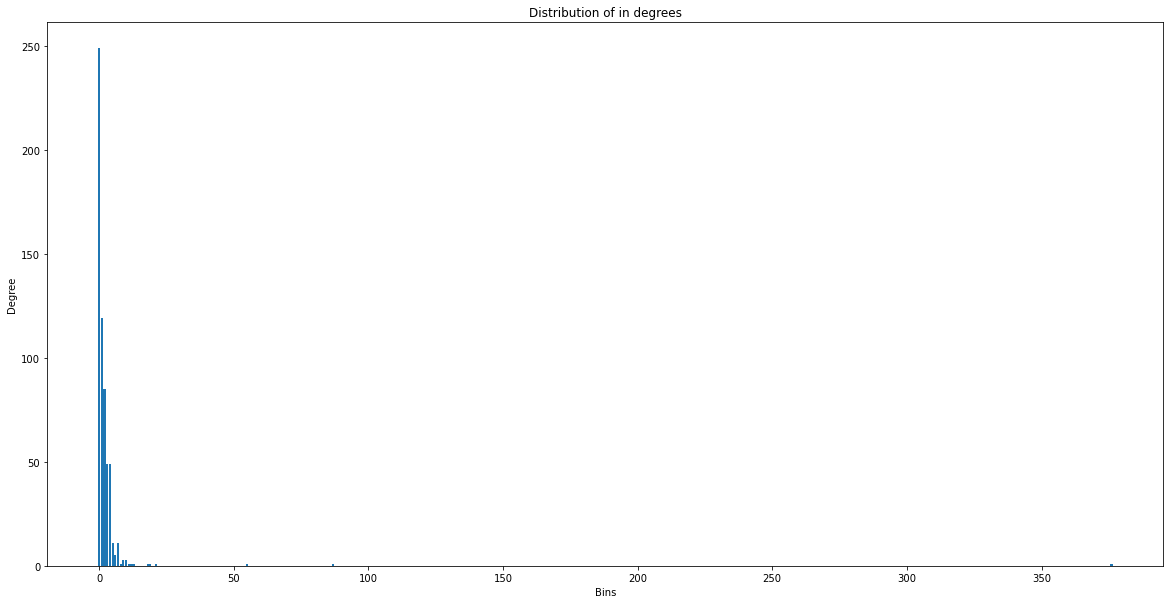

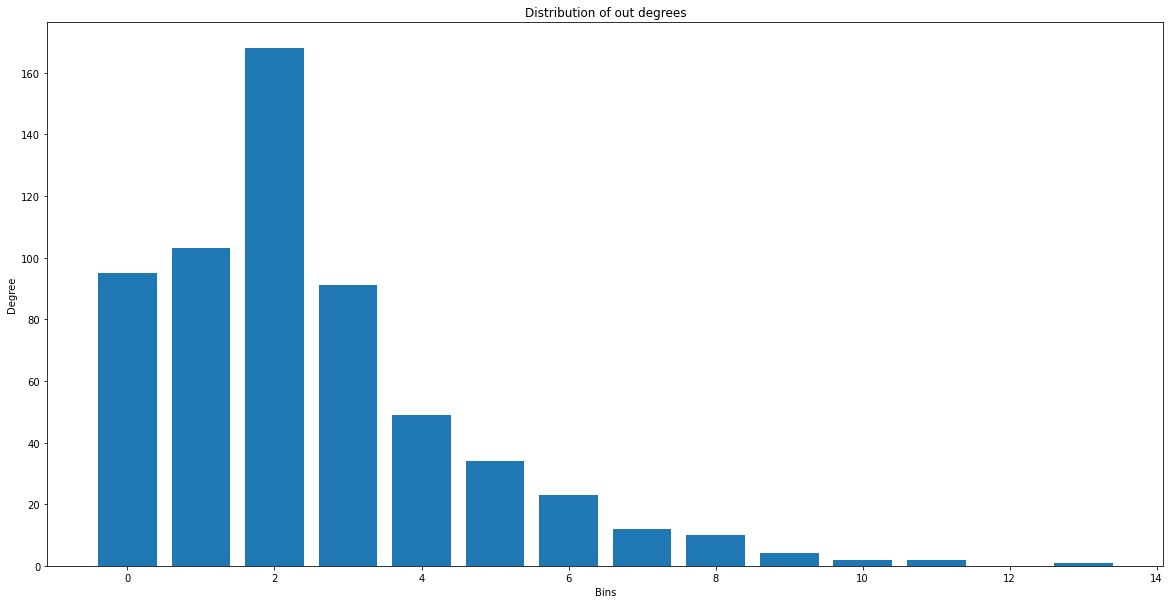

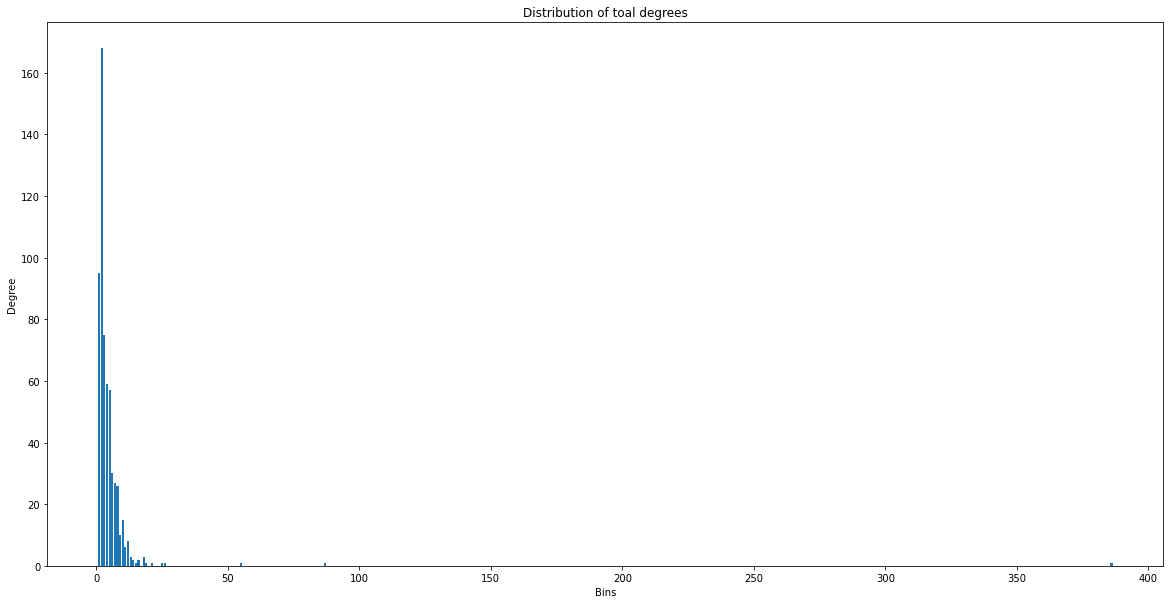

In [409]:
inDegree = [gcc.in_degree(node) for node in gcc.nodes()]
outDegree = [gcc.out_degree(node) for node in gcc.nodes()]
totalDegree = [gcc.degree(node) for node in gcc.nodes()]

maxIn = max(inDegree,key=lambda item:item)
maxOut = max(outDegree,key=lambda item:item)
maxTotal = max(totalDegree,key=lambda item:item)

minIn = min(inDegree,key=lambda item:item)
minOut = min(outDegree,key=lambda item:item)
minTotal = min(totalDegree,key=lambda item:item)

vIn = np.linspace(minIn, maxIn, maxIn-minIn+1)
counts, vIn = np.histogram(inDegree, vIn)
plt.figure(figsize=(20,10))
plt.bar(vIn[:-1], counts)
plt.xlabel("Bins")
plt.ylabel("Degree")
plt.title('Distribution of in degrees')

vOut = np.linspace(minOut, maxOut, maxOut-minOut+1)
counts, vOut = np.histogram(outDegree, vOut)
plt.figure(figsize=(20,10))
plt.bar(vOut[:-1], counts)
plt.xlabel("Bins")
plt.ylabel("Degree")
plt.title('Distribution of out degrees')

vTotal = np.linspace(minTotal, maxTotal, maxTotal-minTotal+1)
counts, vTotal = np.histogram(totalDegree, vTotal)
plt.figure(figsize=(20,10))
plt.bar(vTotal[:-1], counts)
plt.xlabel("Bins")
plt.ylabel("Degree")
plt.title('Distribution of toal degrees')


plt.show()

What we can see from these degree distributions is that the out-degree is much more evenly disrtibuted than the in degree. This would suggest that every character's page has a similar amount of hyperlinks. The in-degree distribution is not even at all. The vast majority of nodes have a few in-edges as can be seen in the distribution. There are a few nodes (characters) with a very high degree of in-edges. We suspect that these are the main characters in the game (e.g. Link), so a large number of minor characters refrence them in their wiki-page.

- Find the exponent of the degree distribution (by using the powerlaw package) for the in- and out-degree distribution. What does it say about our network?


In [425]:
print(powerlaw.Fit(inDegree).alpha)

Calculating best minimal value for power law fit
2.70816329700763


Values less than or equal to 0 in data. Throwing out 0 or negative values


- Compare the degree distribution of the undirected graph to a random network with the same number of nodes and probability of connection p. Comment your results.

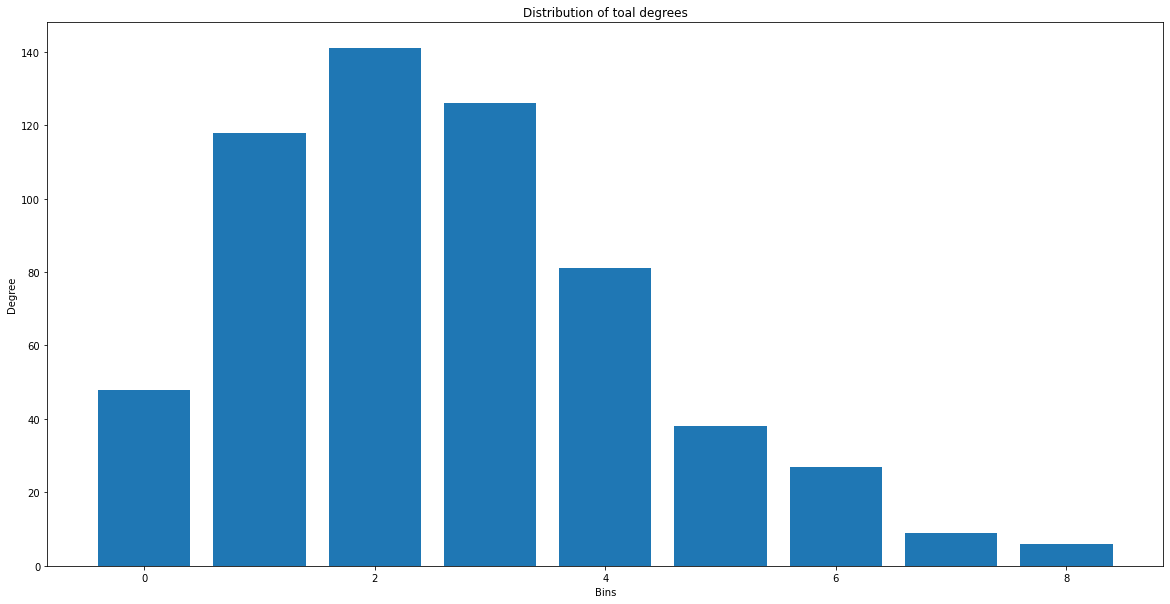

In [408]:
n = gcc.number_of_nodes()
k = gcc.number_of_edges()/ gcc.number_of_nodes()
p = k/(n-1)
gnp = nx.fast_gnp_random_graph(n,p)

degreeGnp = [gnp.degree(node) for node in gnp.nodes()]
maxGnp = max(degreeGnp,key=lambda item:item)
minGnp = min(degreeGnp,key=lambda item:item)

vGnp = np.linspace(minGnp, maxGnp, maxGnp-minGnp+1)
countsGnp, vGnp = np.histogram(degreeGnp, vGnp)
plt.figure(figsize=(20,10))
plt.bar(vGnp[:-1], countsGnp)
plt.xlabel("Bins")
plt.ylabel("Degree")
plt.title('Distribution of toal degrees')
plt.show()


Since the random network (Gnp) is undirected, we can only compare it's degree distribution to the total degree distribution of our Zelda network. We can see that the average degree in the random network is much more evenly distributed than the Zelda network. Since the network is created at random, it is very unlikely that it would have a distribution similar to the Zelda network, where the majority of nodes have only one edge and a single node has around 400 edges, as we see in the Zelda network. The distribution of the random networks resembles a normal distribution.

- Who is the top connected character in BotW? (Report results for the undirected network, in-degrees and out-degrees). Comment on your findings Is this what you would have expected?


In [398]:
AllyInDegree = []
AllyOutDegree = []
AllyTotalDegree = []

EnemyInDegree = []
EnemyOutDegree = []
EnemyTotalDegree = []
for node in gcc.nodes(data=True):
    if bool(node[1]):
        if node[1]['role'] == 'Ally':
            AllyInDegree.append((node[0],gcc.in_degree(node[0])))
            AllyOutDegree.append((node[0],gcc.out_degree(node[0])))
            AllyTotalDegree.append((node[0],gcc.degree(node[0])))
        else:
            EnemyInDegree.append((node[0],gcc.in_degree(node[0])))
            EnemyOutDegree.append((node[0],gcc.out_degree(node[0])))
            EnemyTotalDegree.append((node[0],gcc.degree(node[0])))

inDegree = [(node,G.in_degree(node)) for node in G.nodes()]
outDegree = [(node,G.out_degree(node)) for node in G.nodes()]
totalDegree = [(node,G.degree(node)) for node in G.nodes()]
print( 'The charecter with the highest \'in\' degree is: ',max(inDegree,key=lambda item:item[1])[0])
print( 'The charecter with the highest \'out\' degree is: ',max(outDegree,key=lambda item:item[1])[0])
print( 'The charecter with the highest \'total\' degree is: ',max(totalDegree,key=lambda item:item[1])[0])

The charecter with the highest 'in' degree is:  Link
The charecter with the highest 'out' degree is:  Traysi
The charecter with the highest 'total' degree is:  Link


As expected, the main character of the series, Link, is the most connected character in terms of 'in' degree and in the undirected graph. As the others of this report are not totally familiar with the Zelda games, we are not familiar with the character Traysi, so we can't really comment on that.

- Who are the top 5 most connected allies (again in terms of all edges, and in/out-degree)?

In [399]:
AllyInDegree.sort(key=lambda y: y[1],reverse=True)
AllyOutDegree.sort(key=lambda y: y[1],reverse=True)
AllyTotalDegree.sort(key=lambda y: y[1],reverse=True)

EnemyInDegree.sort(key=lambda y: y[1],reverse=True)
EnemyOutDegree.sort(key=lambda y: y[1],reverse=True)
EnemyTotalDegree.sort(key=lambda y: y[1],reverse=True)
print("The allies with the highest in degree are:")
for i in range (5):
    print(AllyInDegree[i])
print('----------------------------')
print("The allies with the highest out degree are:")
for i in range (5):
    print(AllyOutDegree[i])
print('----------------------------')
print("The top 5 most connected allies are:")
for i in range (5):
    print(AllyTotalDegree[i])

The allies with the highest in degree are:
('Link', 377)
('Riju', 21)
('Mipha', 18)
('Sidon', 13)
('Impa', 12)
----------------------------
The allies with the highest out degree are:
('Traysi', 14)
('Urbosa', 11)
('Link', 10)
('Daruk', 9)
('Impa', 9)
----------------------------
The top 5 most connected allies are:
('Link', 387)
('Riju', 26)
('Mipha', 25)
('Impa', 21)
('Urbosa', 18)


- Who are the top 5 most connected enemies -- bosses included -- (again in terms of all edges in/out-degree)?

In [400]:
print("The enemies with the highest in degree are:")
for i in range (5):
    print(EnemyInDegree[i])
print('----------------------------')
print("The enemies with the highest out degree are:")
for i in range (5):
    print(EnemyOutDegree[i])
print('----------------------------')
print("The top 5 most connected enemies are:")
for i in range (5):
    print(EnemyTotalDegree[i])

The enemies with the highest in degree are:
('Bokoblin', 11)
('Malice', 9)
('Moblin', 8)
('Lizalfos', 7)
('Stalizalfos', 7)
----------------------------
The enemies with the highest out degree are:
('Stalizalfos', 11)
('Moblin', 10)
('Silver_Lizalfos', 9)
('Gerudo_Desert', 9)
('Blue_Lizalfos', 8)
----------------------------
The top 5 most connected enemies are:
('Moblin', 18)
('Stalizalfos', 18)
('Hinox', 13)
('Bokoblin', 12)
('Stalkoblin', 12)
